# Backpropagation
## Álvaro Andrés Esquivel Gómez 11002822

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])
inputs, expected_output

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [3]:
def relu(x):
    return np.maximum(x, 0)

In [4]:
def derivada_relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

### Función multilayer perceptron (MLP)

In [19]:
def xor_neural(inputs, expected_output, epochs = 100, lr = 0.1, epochs_logs = 10):    

    #Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y std = 0.1
    #Definiendo el numero de neuronas por capa
    capa_input, capa_oculta_1, capa_oculta_2, capa_salida = 2, 2, 2, 1
    #Capa oculta 1
    pesos_capa_oculta_1 = np.random.normal(0, 0.1,size=(capa_input, capa_oculta_1))
    sesgos_capa_oculta_1 = np.random.normal(0, 0.1, size=(1, capa_oculta_1))
    #Capa oculta 2
    pesos_capa_oculta_2 = np.random.normal(0, 0.1,size=(capa_oculta_1, capa_oculta_2))
    sesgos_capa_oculta_2 = np.random.normal(0, 0.1, size=(1, capa_oculta_2))
    #Capa de salida
    pesos_capa_salida = np.random.normal(0, 0.1, size=(capa_oculta_2, capa_salida))
    sesgo_capa_salida = np.random.normal(0, 0.1, size=(1, capa_salida))

    print("VALORES INICIALES\n",
          "pesos_capa_oculta_1\n", pesos_capa_oculta_1, 
          "\nsesgos_capa_oculta_1\n", sesgos_capa_oculta_1,
          "\npesos_capa_oculta_2\n", pesos_capa_oculta_2, 
          "\nsesgos_capa_oculta_2\n", sesgos_capa_oculta_2,
          "\npesos_capa_salida\n", pesos_capa_salida, 
          "\nsesgo_capa_salida\n", sesgo_capa_salida, "\n")


    #Entrenamiento
    for i in range(epochs):

        ##Capa oculta 1
        #Producto punto entre inputs y pesos, y sumando sesgos
        valores_capa_oculta_1 = np.dot(inputs, pesos_capa_oculta_1) + sesgos_capa_oculta_1

        #Aplicando la funcion de activacion
        activacion_capa_oculta_1 = relu(valores_capa_oculta_1)

        ##Capa oculta 2
        #Producto punto entre activacion_capa_oculta_1 y pesos_capa_oculta_2
        valores_capa_oculta_2 = np.dot(activacion_capa_oculta_1, pesos_capa_oculta_2) + sesgos_capa_oculta_2

        #Aplicando la funcion de activacion
        activacion_capa_oculta_2 = relu(valores_capa_oculta_2)

        ##Capa de salida
        #Producto punto entre activacion pasada y pesos de salida
        valores_capa_salida = np.dot(activacion_capa_oculta_2, pesos_capa_salida) + sesgo_capa_salida

        #Valores de predicción
        y_hat = valores_capa_salida #Sin Activacion


        #Backpropagation

        #Calculo del error
        error = expected_output - y_hat

        if(i%epochs_logs == 0):
            print("\n------------\n", i,
                  "Error:\n", error,
                  "\npredicted_output:\n", y_hat,
                 "\n------------\n")

        ##Capa oculta 2
        #Error con respecto de la salida, sin derivacion de funcion de activacion
        d_predicted_output = error

        #Error de los pesos de la capa de salida
        error_pesos_capa_salida = np.dot(d_predicted_output, pesos_capa_salida.T)

        #Derivada salida capa oculta con respecto al error
        d_error_activacion_capa_oculta_2 = error_pesos_capa_salida * derivada_relu(activacion_capa_oculta_2)

        #Derivada de la salida con respecto a los pesos de la capa 2
        error_pesos_capa_oculta_2 = np.dot(d_error_activacion_capa_oculta_2, pesos_capa_oculta_2.T)

        #Derivada capa oculta 1 con respecto al error
        d_error_activacion_capa_oculta_1 = error_pesos_capa_oculta_2 * derivada_relu(activacion_capa_oculta_1)

        #Error de los pesos en la capa 1 con respecto al error anterior
        error_pesos_capa_oculta_1 = np.dot(d_error_activacion_capa_oculta_1, pesos_capa_oculta_1.T)


        #Actualizacion de pesos y sesgos
        pesos_capa_salida +=  activacion_capa_oculta_2.T.dot(d_predicted_output) * lr
        sesgo_capa_salida +=  np.sum(d_predicted_output,axis=0,keepdims=True) * lr

        pesos_capa_oculta_2 += activacion_capa_oculta_1.T.dot(d_error_activacion_capa_oculta_2) * lr
        sesgos_capa_oculta_2 += np.sum(d_error_activacion_capa_oculta_2,axis=0,keepdims=True) * lr

        pesos_capa_oculta_1 += inputs.T.dot(d_error_activacion_capa_oculta_1) * lr
        sesgos_capa_oculta_1 += np.sum(d_error_activacion_capa_oculta_1,axis=0,keepdims=True) * lr

    return y_hat, activacion_capa_oculta_2
    

In [21]:
experimento1 = xor_neural(inputs, expected_output, epochs = 1000, lr = 0.1, epochs_logs = 100)
experimento1

VALORES INICIALES
 pesos_capa_oculta_1
 [[ 0.0281225  -0.06365116]
 [ 0.04963409 -0.15217601]] 
sesgos_capa_oculta_1
 [[ 0.04348212 -0.1924092 ]] 
pesos_capa_oculta_2
 [[-0.12550043  0.01487769]
 [-0.06090614 -0.0067358 ]] 
sesgos_capa_oculta_2
 [[-0.12666037  0.07799329]] 
pesos_capa_salida
 [[-0.06374977]
 [-0.09273494]] 
sesgo_capa_salida
 [[-0.10703155]] 


------------
 0 Error:
 [[0.11432424]
 [1.11439272]
 [1.11436304]
 [0.11443152]] 
predicted_output:
 [[-0.11432424]
 [-0.11439272]
 [-0.11436304]
 [-0.11443152]] 
------------


------------
 100 Error:
 [[-0.49878739]
 [ 0.49967034]
 [ 0.50033009]
 [-0.50121218]] 
predicted_output:
 [[0.49878739]
 [0.50032966]
 [0.49966991]
 [0.50121218]] 
------------


------------
 200 Error:
 [[-0.49879886]
 [ 0.49967346]
 [ 0.50032696]
 [-0.50120072]] 
predicted_output:
 [[0.49879886]
 [0.50032654]
 [0.49967304]
 [0.50120072]] 
------------


------------
 300 Error:
 [[-0.49881022]
 [ 0.49967655]
 [ 0.50032387]
 [-0.50118936]] 
predicted_

(array([[0.49888676],
        [0.50030264],
        [0.49969697],
        [0.50111285]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

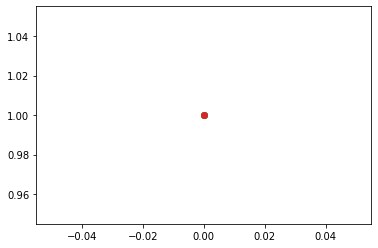

In [31]:
for i in experimento1[1]:
    plt.plot(i[0], i[1], 'o')

VALORES INICIALES
 pesos_capa_oculta_1
 [[ 0.12852162 -0.13807122]
 [-0.03811169  0.02908882]] 
sesgos_capa_oculta_1
 [[0.03517364 0.08044302]] 
pesos_capa_oculta_2
 [[-0.0980121  -0.02058967]
 [-0.20413821  0.01877512]] 
sesgos_capa_oculta_2
 [[ 0.1344975  -0.31779892]] 
pesos_capa_salida
 [[0.08054175]
 [0.05961045]] 
sesgo_capa_salida
 [[0.11511339]] 


------------
 0 Error:
 [[-0.11853137]
 [ 0.88116778]
 [ 0.88248319]
 [-0.11781767]] 
predicted_output:
 [[0.11853137]
 [0.11883222]
 [0.11751681]
 [0.11781767]] 
------------


------------
 100 Error:
 [[-0.50018441]
 [ 0.49806911]
 [ 0.50193018]
 [-0.4998163 ]] 
predicted_output:
 [[0.50018441]
 [0.50193089]
 [0.49806982]
 [0.4998163 ]] 
------------


------------
 200 Error:
 [[-0.5001835 ]
 [ 0.49807957]
 [ 0.50191972]
 [-0.49981721]] 
predicted_output:
 [[0.5001835 ]
 [0.50192043]
 [0.49808028]
 [0.49981721]] 
------------


------------
 300 Error:
 [[-0.50018258]
 [ 0.49808997]
 [ 0.50190933]
 [-0.49981812]] 
predicted_outpu

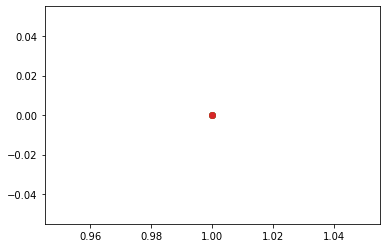

In [32]:
inputs = np.array([[10,10],[10,11],[11,10],[11,11]])
expected_output = np.array([[0],[1],[1],[0]])
inputs, expected_output


experimento2 = xor_neural(inputs, expected_output, epochs = 1000, lr = 0.1, epochs_logs = 100)
experimento2

for i in experimento2[1]:
    plt.plot(i[0], i[1], 'o')

VALORES INICIALES
 pesos_capa_oculta_1
 [[-0.02089982 -0.02640987]
 [ 0.09082793 -0.13923121]] 
sesgos_capa_oculta_1
 [[ 0.00422629 -0.02457408]] 
pesos_capa_oculta_2
 [[ 0.00406046 -0.16830259]
 [-0.01610291  0.09804009]] 
sesgos_capa_oculta_2
 [[-0.05379494  0.01652664]] 
pesos_capa_salida
 [[ 0.22277423]
 [-0.16090082]] 
sesgo_capa_salida
 [[-0.05292735]] 


------------
 0 Error:
 [[0.05781179]
 [1.05493504]
 [1.05739518]
 [0.05547205]] 
predicted_output:
 [[-0.05781179]
 [-0.05493504]
 [-0.05739518]
 [-0.05547205]] 
------------


------------
 100 Error:
 [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]] 
predicted_output:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
------------


------------
 200 Error:
 [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]] 
predicted_output:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
------------


------------
 300 Error:
 [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]] 
predicted_output:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
------------


------------
 400 Error:
 [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]] 
predicted_output:
 [[0.5]


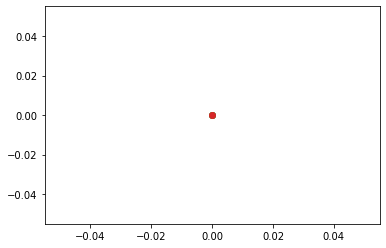

In [33]:
inputs = np.array([[-1,-1],[-1,0],[0,-1],[0,0]])
expected_output = np.array([[0],[1],[1],[0]])
inputs, expected_output


experimento3 = xor_neural(inputs, expected_output, epochs = 1000, lr = 0.1, epochs_logs = 100)
experimento3

for i in experimento3[1]:
    plt.plot(i[0], i[1], 'o')

VALORES INICIALES
 pesos_capa_oculta_1
 [[-0.06881236 -0.14147168]
 [ 0.02250356 -0.0099682 ]] 
sesgos_capa_oculta_1
 [[-0.1327496   0.00774503]] 
pesos_capa_oculta_2
 [[-0.03146009  0.08164386]
 [-0.24262409  0.04469755]] 
sesgos_capa_oculta_2
 [[-0.14726611  0.15836659]] 
pesos_capa_salida
 [[-0.04210171]
 [-0.0978963 ]] 
sesgo_capa_salida
 [[-0.07760662]] 


------------
 0 Error:
 [[0.09311012]
 [1.09311012]
 [1.11003537]
 [0.09314401]] 
predicted_output:
 [[-0.09311012]
 [-0.09311012]
 [-0.11003537]
 [-0.09314401]] 
------------


------------
 100 Error:
 [[-0.64536067]
 [ 0.35463933]
 [ 0.35463933]
 [-0.06759897]] 
predicted_output:
 [[0.64536067]
 [0.64536067]
 [0.64536067]
 [0.06759897]] 
------------


------------
 200 Error:
 [[-6.66608541e-01]
 [ 3.33391459e-01]
 [ 3.33391459e-01]
 [-4.55115397e-04]] 
predicted_output:
 [[6.66608541e-01]
 [6.66608541e-01]
 [6.66608541e-01]
 [4.55115397e-04]] 
------------


------------
 300 Error:
 [[-6.66666295e-01]
 [ 3.33333705e-01]
 [

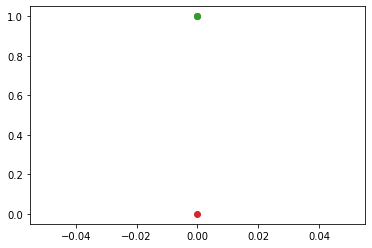

In [34]:
inputs = np.array([[100,100],[100,0],[0,100],[0,0]])
expected_output = np.array([[0],[1],[1],[0]])
inputs, expected_output


experimento4 = xor_neural(inputs, expected_output, epochs = 1000, lr = 0.1, epochs_logs = 100)
experimento4

for i in experimento4[1]:
    plt.plot(i[0], i[1], 'o')

VALORES INICIALES
 pesos_capa_oculta_1
 [[ 0.29070958 -0.17833429]
 [-0.28239953 -0.05002842]] 
sesgos_capa_oculta_1
 [[ 0.19308559 -0.18728593]] 
pesos_capa_oculta_2
 [[-0.08188531  0.06064733]
 [ 0.10670345 -0.03190788]] 
sesgos_capa_oculta_2
 [[-0.03755205  0.05918162]] 
pesos_capa_salida
 [[ 0.15072892]
 [-0.07338438]] 
sesgo_capa_salida
 [[-0.10817068]] 


------------
 0 Error:
 [[0.11341002]
 [1.11251369]
 [1.11470384]
 [0.113447  ]] 
predicted_output:
 [[-0.11341002]
 [-0.11251369]
 [-0.11470384]
 [-0.113447  ]] 
------------


------------
 100 Error:
 [[-0.50251252]
 [ 0.47438617]
 [ 0.52558804]
 [-0.49751326]] 
predicted_output:
 [[0.50251252]
 [0.52561383]
 [0.47441196]
 [0.49751326]] 
------------


------------
 200 Error:
 [[-0.50228205]
 [ 0.47680745]
 [ 0.52316911]
 [-0.4977414 ]] 
predicted_output:
 [[0.50228205]
 [0.52319255]
 [0.47683089]
 [0.4977414 ]] 
------------


------------
 300 Error:
 [[-0.50207259]
 [ 0.4790012 ]
 [ 0.52097749]
 [-0.49794873]] 
predicted_

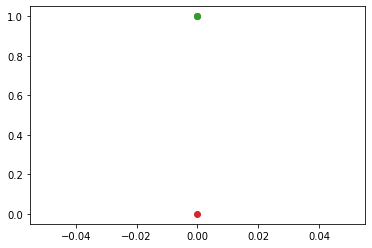

In [35]:
inputs = np.array([[1,1],[1,2],[2,1],[2,2]])
expected_output = np.array([[0],[1],[1],[0]])


experimento5 = xor_neural(inputs, expected_output, epochs = 1000, lr = 0.1, epochs_logs = 100)
print(experimento5)

for i in experimento4[1]:
    plt.plot(i[0], i[1], 'o')

## Conclusiones

Para los 5 tipos de experimentos se puede visualizar que la representación intermedia de la capa oculta 2 toma siempre valores que varían entre 0 y 1 según cada tipo de experimento, sin embargo, es importante agregar que las predicciones generadas logran aprender completamente la salida deseada, toman únicamente valores de 0.5 o aproximaciones cercanas a 0, a pesar de que se experimentó con múltiples variaciones del entrenamiento, creo que el problema se genera por los valores iniciales del experimento, ya que son muy bajos al utilizar una distribución normal centrada en 0 y con distribución estándar 0.1, las neuronas no alcanzan en el entrenamiento el valor de salida adecuado para generar una predicción valida. Haciendo el experimento con una activación sigmoid y una distribución normal centrada en 0 y distribución estándar en 1, los experimentos alcanzan los valores esperados. 